## Part 1 - 优化

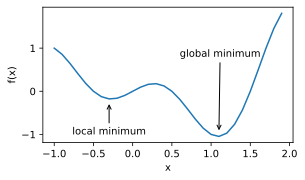

In [1]:
%matplotlib inline
import sys
sys.path.append("..") 
import d2lzh_pytorch as d2l
from mpl_toolkits import mplot3d # 三维画图
import numpy as np

def f(x):
    return x * np.cos(np.pi * x)

d2l.set_figsize((4.5, 2.5))
x = np.arange(-1.0, 2.0, 0.1)
fig,  = d2l.plt.plot(x, f(x))
fig.axes.annotate('local minimum', xy=(-0.3, -0.25), xytext=(-0.77, -1.0),
                  arrowprops=dict(arrowstyle='->'))
fig.axes.annotate('global minimum', xy=(1.1, -0.95), xytext=(0.6, 0.8),
                  arrowprops=dict(arrowstyle='->'))
d2l.plt.xlabel('x')
d2l.plt.ylabel('f(x)');


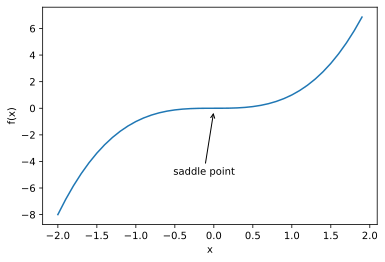

In [2]:
x = np.arange(-2.0, 2.0, 0.1)
fig, = d2l.plt.plot(x, x**3)
fig.axes.annotate('saddle point', xy=(0, -0.2), xytext=(-0.52, -5.0),
                  arrowprops=dict(arrowstyle='->'))
d2l.plt.xlabel('x')
d2l.plt.ylabel('f(x)');


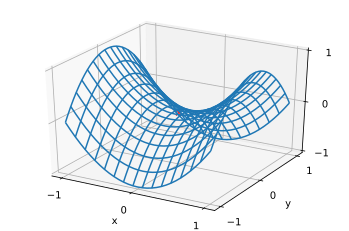

In [3]:
x, y = np.mgrid[-1: 1: 31j, -1: 1: 31j]
z = x**2 - y**2

ax = d2l.plt.figure().add_subplot(111, projection='3d')
ax.plot_wireframe(x, y, z, **{'rstride': 2, 'cstride': 2})
ax.plot([0], [0], [0], 'rx')
ticks = [-1,  0, 1]
d2l.plt.xticks(ticks)
d2l.plt.yticks(ticks)
ax.set_zticks(ticks)
d2l.plt.xlabel('x')
d2l.plt.ylabel('y');

## Part 2 - 动量法

epoch 50, x1 -0.025769, x2 -2.000000


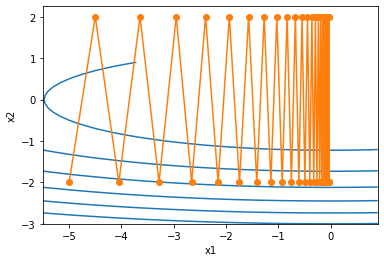

In [12]:
%matplotlib inline
import sys
sys.path.append("..") 
import d2lzh_pytorch as d2l
import torch

eta = 0.5 # 学习率

def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2

def gd_2d(x1, x2, s1, s2):
    v1 = eta * 0.2 * x1
    v2 = eta * 4 * x2
    return x1 - v1, x2 - v2, 0, 0

d2l.show_trace_2d(f_2d, d2l.train_2d(gd_2d, epoch=50))


# 常规的梯度下降法的弊端：一个方向上逼近的同时，另一个方向上可能会因为当前x的值，
# 而导致震荡。x2 = x2 - eta * gd(x2); 而x2恰好为2，则eta*gd(x2)为4，则
# 新的x2为-2，再次做梯度下降更新x2时，新的x2值为（-2）+4 = 2，因此始终无法
# 在x2方向上逼近最优解；


epoch 50, x1 -0.000029, x2 -0.000000


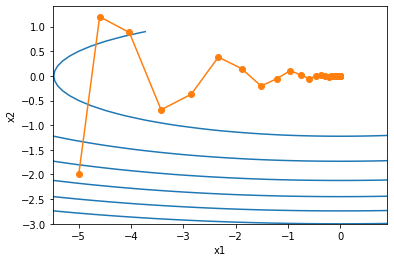

In [14]:
def momentum_2d(x1, x2, v1, v2):
    v1 = gamma * v1 + eta * 0.2 * x1
    v2 = gamma * v2 + eta * 4 * x2
    return x1 - v1, x2 - v2, v1, v2

eta, gamma = 0.4, 0.5
d2l.show_trace_2d(f_2d, d2l.train_2d(momentum_2d, 50))